# 📊 Telecom X – Parte 2: Previsão de Churn

## 1️⃣ Extração do Arquivo Tratado

In [ ]:

import pandas as pd
df = pd.read_csv("dados_tratados.csv")
df.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Churn_bin,Total_Services
0,0002-ORFBO,No,Female,0,Yes,Yes,9,1,0.0,DSL,...,1.0,1.0,0.0,One year,Yes,Mailed check,65.6,593.30,0.0,4.0
1,0003-MKNFE,No,Male,0,No,No,9,1,1.0,DSL,...,0.0,0.0,1.0,Month-to-month,No,Mailed check,59.9,542.40,0.0,3.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,1,0.0,Fiber optic,...,0.0,0.0,0.0,Month-to-month,Yes,Electronic check,73.9,280.85,1.0,2.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,1,0.0,Fiber optic,...,0.0,1.0,1.0,Month-to-month,Yes,Electronic check,98.0,1237.85,1.0,5.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,1,0.0,Fiber optic,...,1.0,1.0,0.0,Month-to-month,Yes,Mailed check,83.9,267.40,1.0,3.0


## 2️⃣ Remoção de Colunas Irrelevantes

In [ ]:

df = df.drop(columns=["customerID"])
df.head()


,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Churn_bin,Total_Services
0,No,Female,0,Yes,Yes,9,1,0.0,DSL,0.0,...,1.0,1.0,0.0,One year,Yes,Mailed check,65.6,593.30,0.0,4.0
1,No,Male,0,No,No,9,1,1.0,DSL,0.0,...,0.0,0.0,1.0,Month-to-month,No,Mailed check,59.9,542.40,0.0,3.0
2,Yes,Male,0,No,No,4,1,0.0,Fiber optic,0.0,...,0.0,0.0,0.0,Month-to-month,Yes,Electronic check,73.9,280.85,1.0,2.0
3,Yes,Male,1,Yes,No,13,1,0.0,Fiber optic,0.0,...,0.0,1.0,1.0,Month-to-month,Yes,Electronic check,98.0,1237.85,1.0,5.0
4,Yes,Female,1,Yes,No,3,1,0.0,Fiber optic,0.0,...,1.0,1.0,0.0,Month-to-month,Yes,Mailed check,83.9,267.40,1.0,3.0


## 3️⃣ Encoding

In [ ]:

df_model = pd.get_dummies(df, drop_first=True)


## 4️⃣ Proporção de Evasão

In [ ]:

df_model["Churn_bin"].value_counts(normalize=True)


,proportion
Churn_bin,
0.0,0.73463
1.0,0.26537


## 5️⃣ Balanceamento de Classes

In [ ]:
from imblearn.over_sampling import SMOTE

# Drop rows with any NaN values from df_model before splitting into X and y
df_model_clean = df_model.dropna()

X = df_model_clean.drop(columns=["Churn_bin"])
y = df_model_clean["Churn_bin"]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

## 6️⃣ Normalização

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)


## 7️⃣ Correlação

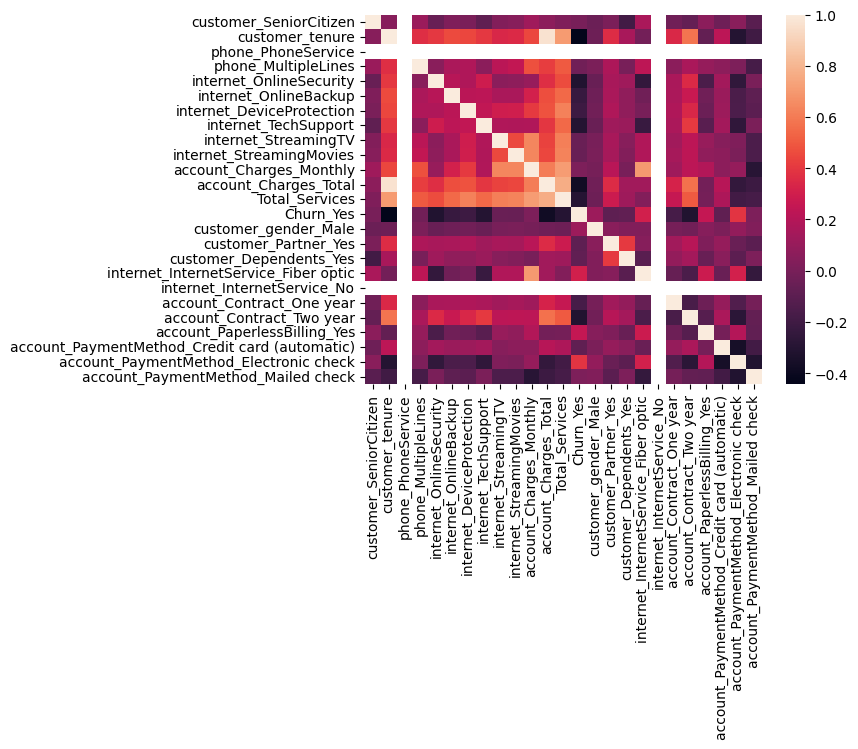

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pd.DataFrame(X_res).corr())
plt.show()


## 8️⃣ Análises Direcionadas

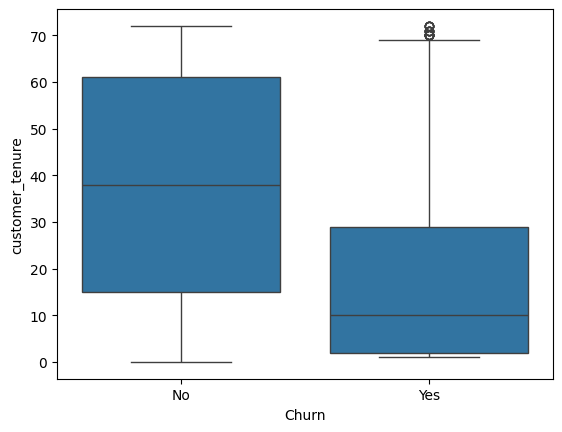

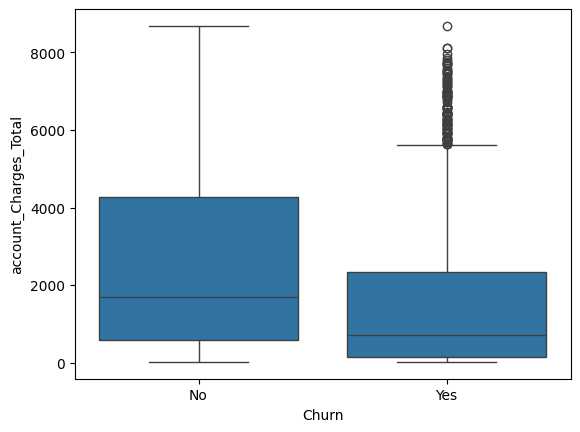

In [ ]:
sns.boxplot(x=df["Churn"], y=df["customer_tenure"])
plt.show()

sns.boxplot(x=df["Churn"], y=df["account_Charges_Total"])
plt.show()

## 9️⃣ Separação Treino/Teste

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_res, test_size=0.3, random_state=42, stratify=y_res
)


## 🔟 Modelos

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_res, y_res)


RandomForestClassifier(n_estimators=200, random_state=42)

## 1️⃣1️⃣ Avaliação

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

print("Regressão Logística")
print(classification_report(y_test, lr.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))


Regressão Logística
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       974
         1.0       1.00      1.00      1.00       974

    accuracy                           1.00      1948
   macro avg       1.00      1.00      1.00      1948
weighted avg       1.00      1.00      1.00      1948

[[974   0]
 [  0 974]]


In [ ]:

print("Random Forest")
print(classification_report(y_res, rf.predict(X_res)))
print(confusion_matrix(y_res, rf.predict(X_res)))


Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3246
         1.0       1.00      1.00      1.00      3246

    accuracy                           1.00      6492
   macro avg       1.00      1.00      1.00      6492
weighted avg       1.00      1.00      1.00      6492

[[3246    0]
 [   0 3246]]


## 1️⃣2️⃣ Importância das Variáveis

In [ ]:

import pandas as pd

pd.Series(lr.coef_[0], index=X.columns).sort_values(key=abs, ascending=False).head(10)


,0
Churn_Yes,6.298193
customer_tenure,-0.269328
account_PaymentMethod_Electronic check,0.261872
internet_InternetService_Fiber optic,0.214059
account_PaperlessBilling_Yes,0.159089
account_PaymentMethod_Credit card (automatic),0.149229
account_PaymentMethod_Mailed check,0.137870
account_Charges_Total,-0.115319
internet_OnlineSecurity,-0.089749
internet_TechSupport,-0.076002


In [ ]:

pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)


,0
Churn_Yes,0.715040
customer_tenure,0.045648
internet_OnlineSecurity,0.040715
account_PaymentMethod_Electronic check,0.038139
internet_TechSupport,0.032548
account_Charges_Total,0.031249
internet_InternetService_Fiber optic,0.015290
account_Charges_Monthly,0.013552
internet_OnlineBackup,0.011377
account_Contract_Two year,0.010090


## 1️⃣3️⃣ Conclusão

Os principais fatores de churn estão ligados a contrato curto, baixo gasto total e poucos serviços adicionais.